In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import nltk

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
# https://arxiv.org/help/api/user-manual
category_map = {
# 'cs.AI': 'Artificial Intelligence',
# 'cs.AR': 'Hardware Architecture',
# 'cs.CC': 'Computational Complexity',
# 'cs.CE': 'Computational Engineering, Finance, and Science',
# 'cs.CG': 'Computational Geometry',
# 'cs.CL': 'Computation and Language',
# 'cs.CR': 'Cryptography and Security',
'cs.CV': 'Computer Vision and Pattern Recognition',
# 'cs.CY': 'Computers and Society',
# 'cs.DB': 'Databases',
# 'cs.DC': 'Distributed, Parallel, and Cluster Computing',
# 'cs.DL': 'Digital Libraries',
# 'cs.DM': 'Discrete Mathematics',
# 'cs.DS': 'Data Structures and Algorithms',
# 'cs.ET': 'Emerging Technologies',
# 'cs.FL': 'Formal Languages and Automata Theory',
# 'cs.GL': 'General Literature',
# 'cs.GR': 'Graphics',
# 'cs.GT': 'Computer Science and Game Theory',
# 'cs.HC': 'Human-Computer Interaction',
# 'cs.IR': 'Information Retrieval',
# 'cs.IT': 'Information Theory',
'cs.LG': 'Machine Learning',
# 'cs.LO': 'Logic in Computer Science',
# 'cs.MA': 'Multiagent Systems',
# 'cs.MM': 'Multimedia',
# 'cs.MS': 'Mathematical Software',
# 'cs.NA': 'Numerical Analysis',
# 'cs.NE': 'Neural and Evolutionary Computing',
# 'cs.NI': 'Networking and Internet Architecture',
# 'cs.OH': 'Other Computer Science',
# 'cs.OS': 'Operating Systems',
# 'cs.PF': 'Performance',
# 'cs.PL': 'Programming Languages',
'cs.RO': 'Robotics',
# 'cs.SC': 'Symbolic Computation',
# 'cs.SD': 'Sound',
# 'cs.SE': 'Software Engineering',
# 'cs.SI': 'Social and Information Networks',
# 'cs.SY': 'Systems and Control',
}

In [3]:
def get_data():
    path = 'arxiv-metadata-oai-snapshot.json'
    file = open(path, 'r')
    for i in file:
        yield i

        
titles = []
abstracts = []
years = []
data = get_data()

In [4]:

cat = []

for paper in data:
    paper_dict = json.loads(paper)
#     ref = paper_dict.get('journal-ref')
    try:
        if paper_dict.get('categories').split(" ")[0] in category_map:
#             years.append(int(ref[-4:]))
            titles.append(paper_dict.get('title'))
            abstracts.append(paper_dict.get('abstract'))
            cat.append(
                category_map[
                    paper_dict.get('categories').split(" ")[0]
                ]
            )
#             print(paper_dict.get('title'))
#             print(paper_dict.get('categories').split(" ")[0])
#             print(category_map[paper_dict.get('categories').split(" ")[0]])
#             print(" ")
    except:
        pass


In [5]:
print(len(abstracts))
print(len(titles))
print(len(years))
print(len(cat))

99579
99579
0
99579


In [6]:
arxiv_df = pd.DataFrame({'title':titles, 'abstract':abstracts, 'category':cat})

In [7]:
arxiv_df.shape

(99579, 3)

In [8]:
rob_paper1 = 'The Kinematic design of a 3-dof Hybrid Manipulator'
rob_paper2 =  'Bipedal Walking Robot using Deep Deterministic Policy Gradient'
rob_paper3 =  'Learning Quadrupedal Locomotion over Challenging Terrain'

ml_paper1 =  'Playing Atari with Deep Reinforcement Learning'
ml_paper2 = 'Proximal Policy Optimization Algorithms'
ml_paper3 =  'Machine Learning for Structured Clinical Data'

# for i in arxiv_df[arxiv_df['category']=='Robotics']['title']:
#     print(i)

In [9]:
lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.add('n')
stop_words.add('k')

def clean_text(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    text = ' '.join(text.split())
    text = text.lower()
    temp_sent =[]
    words = nltk.word_tokenize(text)
    for i, word in enumerate(words):
        lemmatized = lemmatizer.lemmatize(word)
        if lemmatized not in stop_words and lemmatized.isalpha():
            temp_sent.append(lemmatized)

    finalsent = ' '.join(temp_sent)
    return finalsent
  

In [10]:
# creating clean text feature
features = ['title', 'abstract']
for feature in features:
    arxiv_df['clean_' + feature] = arxiv_df[feature].apply(clean_text)

In [11]:
arxiv_df.head()

,title,abstract,category,clean_title,clean_abstract
0,The on-line shortest path problem under partia...,The on-line shortest path problem is conside...,Machine Learning,line shortest path problem partial monitoring,line shortest path problem considered various ...
1,A neural network approach to ordinal regression,Ordinal regression is an important type of l...,Machine Learning,neural network approach ordinal regression,ordinal regression important type learning ha ...
2,Text Line Segmentation of Historical Documents...,There is a huge amount of historical documen...,Computer Vision and Pattern Recognition,text line segmentation historical document survey,huge amount historical document library variou...
3,Parametric Learning and Monte Carlo Optimization,This paper uncovers and explores the close r...,Machine Learning,parametric learning monte carlo optimization,paper uncovers explores close relationship mon...
4,Preconditioned Temporal Difference Learning,This paper has been withdrawn by the author....,Machine Learning,preconditioned temporal difference learning,paper ha withdrawn author draft withdrawn poor...


In [12]:
arxiv_df['titract'] = arxiv_df['clean_title']+' ' + arxiv_df['clean_abstract']

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvec = TfidfVectorizer()
tfidf_titract = tfidfvec.fit_transform(arxiv_df['titract'])

from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_titract, tfidf_titract)

In [14]:
# np.save("../cos_sim.npy", cos_sim)
# cos_sim = np.load('../cos_sim.npy')

In [15]:
# 79GB !!!
cos_sim.shape

(99579, 99579)

In [16]:
a_df = arxiv_df.set_index('title')
indices = pd.Series(a_df.index)
  
def get_recommendations(query, cosine_sim):
    rec_papers = []
    index = indices[indices==query].index[0]
    sim_socres = pd.Series(cos_sim[index]).sort_values(ascending=False)
    top_papers = list(sim_socres.iloc[1:11].index)
    for i in top_papers:
        rec_papers.append(list(a_df.index)[i])
    return rec_papers


In [17]:
print("query: ",'A neural network approach to ordinal regression')
get_recommendations('A neural network approach to ordinal regression', cos_sim)

query:  A neural network approach to ordinal regression


['Convolutional Ordinal Regression Forest for Image Ordinal Estimation',
 'Transductive Ordinal Regression',
 'Robust Deep Ordinal Regression Under Label Noise',
 'Rank consistent ordinal regression for neural networks with application\n  to age estimation',
 'Tackling Ordinal Regression Problem for Heterogeneous Data: Sparse and\n  Deep Multi-Task Learning Approaches',
 'Ordinal Regression as Structured Classification',
 'Semi-Supervised Ordinal Regression Based on Empirical Risk Minimization',
 'Deep Ordinal Reinforcement Learning',
 'Learning Probabilistic Ordinal Embeddings for Uncertainty-Aware\n  Regression',
 'Meta ordinal weighting net for improving lung nodule classification']

In [18]:
print("query: ",rob_paper1)
get_recommendations(rob_paper1, cos_sim)

query:  The Kinematic design of a 3-dof Hybrid Manipulator


['Working Modes and Aspects in Fully-Parallel Manipulator',
 'Uniqueness Domains in the Workspace of Parallel Manipulators',
 'The Kinematic Analysis of a Symmetrical Three-Degree-of-Freedom Planar\n  Parallel Manipulator',
 'Topology Design and Position Analysis of a Reconfigurable Modular\n  Hybrid-Parallel Manipulator',
 'Definition sets for the Direct Kinematics of Parallel Manipulators',
 'The Kinematics of Manipulators Built From Closed Planar Mechanisms',
 'Singularity Surfaces and Maximal Singularity-Free Boxes in the Joint\n  Space of Planar 3-RPR Parallel Manipulators',
 'Kinematic analysis of the 3-RPR parallel manipulator',
 'Moveability and Collision Analysis for Fully-Parallel Manipulators',
 'Singularity Analysis of Lower-Mobility Parallel Manipulators Using\n  Grassmann-Cayley Algebra']

In [19]:
print("query: ",rob_paper2)
get_recommendations(rob_paper2, cos_sim)

query:  Bipedal Walking Robot using Deep Deterministic Policy Gradient


['Hybrid Zero Dynamics Inspired Feedback Control Policy Design for 3D\n  Bipedal Locomotion using Reinforcement Learning',
 'Dynamic Walking: Toward Agile and Efficient Bipedal Robots',
 'Reinforcement Learning for Robust Parameterized Locomotion Control of\n  Bipedal Robots',
 'Robust Bipedal Locomotion Control Based on Model Predictive Control and\n  Divergent Component of Motion',
 'Learning Linear Policies for Robust Bipedal Locomotion on Terrains with\n  Varying Slopes',
 '3D Underactuated Bipedal Walking via H-LIP based Gait Synthesis and\n  Stepping Stabilization',
 'Impact-Aware Online Motion Planning for Fully-Actuated Bipedal Robot\n  Walking',
 'Pattern Generation for Walking on Slippery Terrains',
 'Self-synchronization and Self-stabilization of 3D Bipedal Walking Gaits',
 'Capture Steps: Robust Walking for Humanoid Robots']

In [20]:
print("query: ",rob_paper3)
get_recommendations(rob_paper3, cos_sim)

query:  Learning Quadrupedal Locomotion over Challenging Terrain


['Reactive Task and Motion Planning for Robust Whole-Body Dynamic\n  Locomotion in Constrained Environments',
 'RLOC: Terrain-Aware Legged Locomotion using Reinforcement Learning and\n  Optimal Control',
 'Learning Vision-Guided Quadrupedal Locomotion End-to-End with\n  Cross-Modal Transformers',
 'Zero-Shot Terrain Generalization for Visual Locomotion Policies',
 'Oncilla robot: a versatile open-source quadruped research robot with\n  compliant pantograph legs',
 'Autonomous Locomotion Mode Transition Simulation of a Track-legged\n  Quadruped Robot Step Negotiation',
 'GLiDE: Generalizable Quadrupedal Locomotion in Diverse Environments with\n  a Centroidal Model',
 'Optimization-Based Quadrupedal Hybrid Wheeled-Legged Locomotion',
 'Rolling in the Deep -- Hybrid Locomotion for Wheeled-Legged Robots using\n  Online Trajectory Optimization',
 'Learning agile and dynamic motor skills for legged robots']

In [21]:
print("query: ",ml_paper1)
get_recommendations(ml_paper1, cos_sim)

query:  Playing Atari with Deep Reinforcement Learning


['Distributed Deep Q-Learning',
 'Model-Based Reinforcement Learning for Atari',
 'Object-sensitive Deep Reinforcement Learning',
 'Reinforcement Learning and Video Games',
 'Reward learning from human preferences and demonstrations in Atari',
 'Deep Reinforcement Learning With Macro-Actions',
 'Visual Transfer between Atari Games using Competitive Reinforcement\n  Learning',
 'Observe and Look Further: Achieving Consistent Performance on Atari',
 'Transformer Based Reinforcement Learning For Games',
 'Action-Conditional Video Prediction using Deep Networks in Atari Games']

In [22]:
print("query: ",ml_paper2)
get_recommendations(ml_paper2, cos_sim)

query:  Proximal Policy Optimization Algorithms


['An Adaptive Clipping Approach for Proximal Policy Optimization',
 'Proximal Policy Optimization Smoothed Algorithm',
 'Proximal Policy Gradient: PPO with Policy Gradient',
 'Truly Proximal Policy Optimization',
 'Interpolated Policy Gradient: Merging On-Policy and Off-Policy Gradient\n  Estimation for Deep Reinforcement Learning',
 'Optimistic Distributionally Robust Policy Optimization',
 'Supervised Policy Update for Deep Reinforcement Learning',
 'Trust Region-Guided Proximal Policy Optimization',
 'Neural Proximal/Trust Region Policy Optimization Attains Globally\n  Optimal Policy',
 'A Logarithmic Barrier Method For Proximal Policy Optimization']

In [23]:
print("query: ",ml_paper3)
get_recommendations(ml_paper3, cos_sim)

query:  Machine Learning for Structured Clinical Data


['Representation Learning for Electronic Health Records',
 'Unsupervised Extraction of Phenotypes from Cancer Clinical Notes for\n  Association Studies',
 'Understanding Heart-Failure Patients EHR Clinical Features via SHAP\n  Interpretation of Tree-Based Machine Learning Model Predictions',
 'Deep Representation Learning of Patient Data from Electronic Health\n  Records (EHR): A Systematic Review',
 'Longitudinal modeling of MS patient trajectories improves predictions of\n  disability progression',
 'Neural Clinical Event Sequence Prediction through Personalized Online\n  Adaptive Learning',
 'Clinically Meaningful Comparisons Over Time: An Approach to Measuring\n  Patient Similarity based on Subsequence Alignment',
 'Learning from Clinical Judgments: Semi-Markov-Modulated Marked Hawkes\n  Processes for Risk Prognosis',
 'A Probabilistic Disease Progression Model for Predicting Future Clinical\n  Outcome',
 "Forecasting the Progression of Alzheimer's Disease Using Neural Networks\n  

In [24]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(8,6))
    ax2 = fig.add_subplot(1,1,1)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('pastel'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

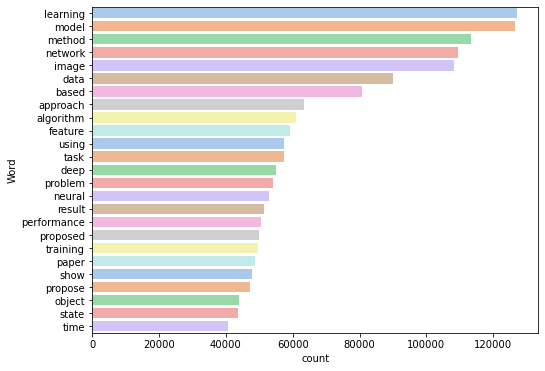

In [25]:
freq_words(arxiv_df['titract'], 25)

In [26]:
(set(arxiv_df['category']))

{'Computer Vision and Pattern Recognition', 'Machine Learning', 'Robotics'}

In [48]:
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec, TaggedDocument



In [49]:
# data = {}
# for idx, line in arxiv_df.iterrows():
#     data[line['title']] = line['titract']
    

In [50]:
arxiv_df['titract_nc'] = arxiv_df['title']+' ' + arxiv_df['abstract']

data = {}
for idx, line in arxiv_df.iterrows():
    data[line['title']] = line['titract_nc']
    

In [56]:
documents = [TaggedDocument((word_tokenize(data[tag])), tags=[tag]) for tag in data.keys()]

d2v_model = Doc2Vec(vector_size=400, alpha=0.025, min_count=4, dm=1, epochs=80)
d2v_model.build_vocab(documents)

In [57]:
# d2v_model.train(documents, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)

# d2v_model.save("d2v.model")

In [58]:
# d2v_model = Doc2Vec.load('d2v.model')

def get_recommendations_d2v(query):
    print("query: ",query,'\n')

    doc_vec = d2v_model.infer_vector(word_tokenize(query))
#     print("doc_vec: ",doc_vec)

    similarity = d2v_model.dv.most_similar([doc_vec])
    result = []
    for i in similarity:
        result.append(i[0])
    return result

In [59]:
get_recommendations_d2v(rob_paper1)

query:  The Kinematic design of a 3-dof Hybrid Manipulator 



['The Effect of Class Definitions on the Transferability of Adversarial\n  Attacks Against Forensic CNNs',
 'Seeing Out of tHe bOx: End-to-End Pre-training for Vision-Language\n  Representation Learning',
 'Pattern Detection in the Activation Space for Identifying Synthesized\n  Content',
 'Discriminative Video Representation Learning Using Support Vector\n  Classifiers',
 'Data Poisoning against Differentially-Private Learners: Attacks and\n  Defenses',
 'A Framework for Evaluating Motion Segmentation Algorithms',
 'WhONet: Wheel Odometry Neural Network for Vehicular Localisation in\n  GNSS-Deprived Environments',
 'Anatomical Data Augmentation via Fluid-based Image Registration',
 'Refine and Distill: Exploiting Cycle-Inconsistency and Knowledge\n  Distillation for Unsupervised Monocular Depth Estimation',
 'A Review on Image Texture Analysis Methods']

In [60]:
# get_recommendations(rob_paper1, cos_sim)

In [61]:
get_recommendations_d2v(rob_paper2)

query:  Bipedal Walking Robot using Deep Deterministic Policy Gradient 



['Spatiotemporal Stacked Sequential Learning for Pedestrian Detection',
 'Online Robust Sliding-Windowed LiDAR SLAM in Natural Environments',
 'Improving the Expressive Power of Graph Neural Network with Tinhofer\n  Algorithm',
 'A Study into the similarity in generator and discriminator in GAN\n  architecture',
 'Occupancy Map Building through Bayesian Exploration',
 'A Graph Theoretic Additive Approximation of Optimal Transport',
 'Universal time-series forecasting with mixture predictors',
 'Task Planning on Stochastic Aisle Graphs for Precision Agriculture',
 'Learning and Reasoning with Action-Related Places for Robust Mobile\n  Manipulation',
 'Temporal HeartNet: Towards Human-Level Automatic Analysis of Fetal\n  Cardiac Screening Video']

In [62]:
get_recommendations_d2v(rob_paper3)

query:  Learning Quadrupedal Locomotion over Challenging Terrain 



['Learning to Transfer: Unsupervised Meta Domain Translation',
 'Efficient Behavior-aware Control of Automated Vehicles at Crosswalks\n  using Minimal Information Pedestrian Prediction Model',
 'Learning Raw Image Denoising with Bayer Pattern Unification and Bayer\n  Preserving Augmentation',
 'Does elderly enjoy playing Bingo with a robot? A case study with the\n  humanoid robot Nadine',
 'Identity Enhanced Residual Image Denoising',
 'Fibres of Failure: Classifying errors in predictive processes',
 'Improving the Expressiveness of Deep Learning Frameworks with Recursion',
 'Machine learning methods for multimedia information retrieval',
 'On Counterfactual Explanations under Predictive Multiplicity',
 'Missingness Augmentation: A General Approach for Improving Generative\n  Imputation Models']

In [63]:
get_recommendations_d2v(ml_paper1)

query:  Playing Atari with Deep Reinforcement Learning 



['Classification Under Misspecification: Halfspaces, Generalized Linear\n  Models, and Connections to Evolvability',
 'Collective Intelligence for Control of Distributed Dynamical Systems',
 'Automated Radiological Report Generation For Chest X-Rays With\n  Weakly-Supervised End-to-End Deep Learning',
 'Automatic Cause Detection of Performance Problems in Web Applications',
 'Semi-supervised semantic segmentation needs strong, varied perturbations',
 'Gradual Domain Adaptation in the Wild:When Intermediate Distributions\n  are Absent',
 'Self-Supervised Structure-from-Motion through Tightly-Coupled Depth and\n  Egomotion Networks',
 'V3H: View Variation and View Heredity for Incomplete Multi-view\n  Clustering',
 'Scalable Inference of Sparsely-changing Markov Random Fields with Strong\n  Statistical Guarantees',
 'Random Feature Maps via a Layered Random Projection (LaRP) Framework for\n  Object Classification']

In [64]:
get_recommendations_d2v(ml_paper2)

query:  Proximal Policy Optimization Algorithms 



['Rotate-and-Render: Unsupervised Photorealistic Face Rotation from\n  Single-View Images',
 'Hierarchical multi-class segmentation of glioma images using networks\n  with multi-level activation function',
 'GeLaTO: Generative Latent Textured Objects',
 'Convolutional Neural Networks based Intra Prediction for HEVC',
 "Beyond the Self: Using Grounded Affordances to Interpret and Describe\n  Others' Actions",
 'Graph Classification with 2D Convolutional Neural Networks',
 'Visual Saliency Model using SIFT and Comparison of Learning Approaches',
 'Planning Nonlinear Access Paths for Temporal Bone Surgery',
 'Real Time Multi-Class Object Detection and Recognition Using Vision\n  Augmentation Algorithm',
 'A Novel Dual-Lidar Calibration Algorithm Using Planar Surfaces']

In [65]:
get_recommendations_d2v(ml_paper3)

query:  Machine Learning for Structured Clinical Data 



['Adversarial Diversity and Hard Positive Generation',
 'An Analytical Lidar Sensor Model Based on Ray Path Information',
 'Domain-Invariant Projection Learning for Zero-Shot Recognition',
 'Occlusion-guided compact template learning for ensemble deep\n  network-based pose-invariant face recognition',
 'Dropout: Explicit Forms and Capacity Control',
 "Formalizing Neurath's Ship: Approximate Algorithms for Online Causal\n  Learning",
 'A New Vision of Collaborative Active Learning',
 'Dimensionality-Driven Learning with Noisy Labels',
 'End-to-end Hand Mesh Recovery from a Monocular RGB Image',
 'MATCHA: Speeding Up Decentralized SGD via Matching Decomposition\n  Sampling']

In [13]:
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5" 
embed = hub.load(module_url)


In [14]:
arxiv_df['titract_nc'] = arxiv_df['title']+' ' + arxiv_df['abstract']

df = arxiv_df.sample(n=50000, random_state=42)

use_embedding = embed(df['titract_nc'].to_list())

In [15]:
search_token = "human trajectory prediction "

print("search_token: ",search_token)

use_vec = embed([search_token])[0]
print("USE: ",use_vec)


search_token:  human trajectory prediction 
USE:  tf.Tensor(
[ 0.04073656 -0.03231573 -0.03585198  0.03549797  0.08224856 -0.02719136
  0.02041592 -0.0635589   0.01714143 -0.00502469 -0.06297838  0.01660468
  0.04847197 -0.01998676 -0.07153309 -0.00850366 -0.01313019  0.06846194
  0.05898756  0.01383114  0.03093348  0.003158   -0.00256129  0.00554785
 -0.02763977 -0.01921695 -0.05472223 -0.02757262 -0.0057967   0.07744708
  0.00564554  0.03466818  0.05189236  0.04228954 -0.03473291  0.02671894
  0.05278528  0.01908896 -0.00971078 -0.02939167  0.08067372 -0.06457597
 -0.02265274  0.00369014  0.00716437 -0.05474822 -0.01123452 -0.06552526
 -0.00072885 -0.03248378  0.05952569 -0.08006568  0.06238867  0.01756159
  0.00660866 -0.0161346   0.02894862  0.02155604 -0.00811373 -0.05499836
  0.06563846  0.00222129 -0.03739399 -0.04376139 -0.00713051  0.0438366
 -0.02508482 -0.00175284  0.00578799  0.0360475   0.01875958  0.00574725
  0.08186598 -0.04414852 -0.00445441 -0.03743169  0.01712287  0.

In [16]:
use_vec.shape

TensorShape([512])

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

def get_recommendations_use(query):
    print("query: ", query)
    sim = {}
    use_vec = embed([query])[0]
    for idx,sent in enumerate(df['title']):
        score = cosine(use_vec, use_embedding[idx])
        sim[score]= sent

    sim = dict(sorted(sim.items(), reverse=True)[:10])
    return sim

In [39]:
get_recommendations_use(rob_paper1)

query:  The Kinematic design of a 3-dof Hybrid Manipulator


{0.46602717: 'Autonomous Hybrid Ground/Aerial Mobility in Unknown Environments',
 0.4406929: 'Design, analysis and control of the series-parallel hybrid RH5 humanoid\n  robot',
 0.43210438: 'A new line-symmetric mobile infinity-pod',
 0.42856362: 'Kinematic analysis of the 3-RPR parallel manipulator',
 0.41783068: 'Kinematically Redundant Octahedral Motion Platform for Virtual Reality\n  Simulations',
 0.4176771: 'A Hybrid Approach for Trajectory Control Design',
 0.4149334: 'Design of a Three-Axis Isotropic Parallel Manipulator for Machining\n  Applications: The Orthoglide',
 0.4070761: 'Efficient Kinematic Planning for Mobile Manipulators with Non-holonomic\n  Constraints Using Optimal Control',
 0.40530807: 'Kinematics of A 3-PRP planar parallel robot',
 0.40163675: 'A Receding Horizon Push Recovery Strategy for Balancing the iCub\n  Humanoid Robot'}

In [40]:
get_recommendations_use(rob_paper2)

query:  Bipedal Walking Robot using Deep Deterministic Policy Gradient


{0.6496586: 'Bipedal Walking Robot using Deep Deterministic Policy Gradient',
 0.5817887: 'Learning Linear Policies for Robust Bipedal Locomotion on Terrains with\n  Varying Slopes',
 0.5756719: 'Force-and-moment-based Model Predictive Control for Achieving Highly\n  Dynamic Locomotion on Bipedal Robots',
 0.56612515: 'Dynamic Legged Manipulation of a Ball Through Multi-Contact Optimization',
 0.56393343: 'Robust Quadrupedal Locomotion on Sloped Terrains: A Linear Policy\n  Approach',
 0.5617554: 'Dynamic Walking on Slippery Surfaces: Demonstrating Stable Bipedal Gaits\n  with Planned Ground Slippage',
 0.5562693: 'An Efficiently Solvable Quadratic Program for Stabilizing Dynamic\n  Locomotion',
 0.5524099: 'Energy-Efficient Motion Planning for Multi-Modal Hybrid Locomotion',
 0.55092716: 'Experiential Robot Learning with Accelerated Neuroevolution',
 0.5493945: 'A Legged Soft Robot Platform for Dynamic Locomotion'}

In [41]:
get_recommendations_use(rob_paper3)

query:  Learning Quadrupedal Locomotion over Challenging Terrain


{0.5854457: 'Quadruped Locomotion on Non-Rigid Terrain using Reinforcement Learning',
 0.57908493: 'Learning Quadrupedal Locomotion over Challenging Terrain',
 0.5777056: 'Learning Vision-Guided Quadrupedal Locomotion End-to-End with\n  Cross-Modal Transformers',
 0.5580227: 'Learning Linear Policies for Robust Bipedal Locomotion on Terrains with\n  Varying Slopes',
 0.55210364: 'Hierarchical Reinforcement Learning for Quadruped Locomotion',
 0.55004674: 'Robust Quadrupedal Locomotion on Sloped Terrains: A Linear Policy\n  Approach',
 0.5463466: 'Learning Active Spine Behaviors for Dynamic and Efficient Locomotion in\n  Quadruped Robots',
 0.53348005: 'DeepWalk: Omnidirectional Bipedal Gait by Deep Reinforcement Learning',
 0.52879804: 'Learning Generalizable Locomotion Skills with Hierarchical Reinforcement\n  Learning',
 0.516218: 'Model-free Reinforcement Learning for Robust Locomotion Using Trajectory\n  Optimization for Exploration'}

In [42]:
get_recommendations_use(ml_paper1)

query:  Playing Atari with Deep Reinforcement Learning


{0.5468781: 'Object-sensitive Deep Reinforcement Learning',
 0.5436386: 'Model-Based Reinforcement Learning for Atari',
 0.5305242: 'On Catastrophic Interference in Atari 2600 Games',
 0.52856165: 'Performing Deep Recurrent Double Q-Learning for Atari Games',
 0.52327317: 'Deep Reinforcement Learning for Doom using Unsupervised Auxiliary Tasks',
 0.52122575: 'Deep Reinforcement Learning from Self-Play in Imperfect-Information\n  Games',
 0.5205137: 'Transferring Deep Reinforcement Learning with Adversarial Objective and\n  Augmentation',
 0.5121579: 'Accelerated Methods for Deep Reinforcement Learning',
 0.51064587: 'Inverse reinforcement learning for video games',
 0.50384545: 'State of the Art Control of Atari Games Using Shallow Reinforcement\n  Learning'}

In [43]:
get_recommendations_use(ml_paper2)

query:  Proximal Policy Optimization Algorithms


{0.6822812: 'Proximal Deterministic Policy Gradient',
 0.6508867: 'Proximal Policy Optimization Smoothed Algorithm',
 0.64691883: 'Riemannian Proximal Policy Optimization',
 0.6431553: 'Policy Optimization as Wasserstein Gradient Flows',
 0.61832505: 'Policy Optimization With Penalized Point Probability Distance: An\n  Alternative To Proximal Policy Optimization',
 0.5993321: 'Proximal Policy Optimization via Enhanced Exploration Efficiency',
 0.5962317: 'Robust Optimization for Non-Convex Objectives',
 0.5882736: 'Provably Efficient Exploration in Policy Optimization',
 0.584838: 'Direct Policy Optimization using Deterministic Sampling and Collocation',
 0.582313: 'Efficient Algorithms for Non-convex Isotonic Regression through\n  Submodular Optimization'}

In [44]:
get_recommendations_use(ml_paper3)

query:  Machine Learning for Structured Clinical Data


{0.6288282: 'Machine Learning for Clinical Predictive Analytics',
 0.58321744: 'Multimodal Machine Learning for Automated ICD Coding',
 0.577671: 'Supervised Learning on Relational Databases with Graph Neural Networks',
 0.57511437: 'A Framework for Implementing Machine Learning on Omics Data',
 0.5728103: 'Techniques for Automated Machine Learning',
 0.569126: 'Adversarial Training for Patient-Independent Feature Learning with IVOCT\n  Data for Plaque Classification',
 0.5596535: 'Representation Learning for Medical Data',
 0.5569516: 'Benchmark of Deep Learning Models on Large Healthcare MIMIC Datasets',
 0.55065995: 'Train, Learn, Expand, Repeat',
 0.54737556: 'Pitfalls in Machine Learning Research: Reexamining the Development Cycle'}

In [19]:
# search_token = "image analysis using generative "
print("query : ",search_token)
sim

query :  human trajectory prediction 


{0.32717863: 'Soft Motion Trajectory Planner for Service Manipulator Robot',
 0.31405118: 'Prediction with Advice of Unknown Number of Experts',
 0.3133469: 'Image Processing in Optical Guidance for Autonomous Landing of Lunar\n  Probe',
 0.28519568: 'Clinical gait data analysis based on Spatio-Temporal features',
 0.28512505: 'Dynamic Motion Modelling for Legged Robots',
 0.2805346: 'A tutorial on conformal prediction',
 0.2799455: 'Multi-Label Prediction via Compressed Sensing',
 0.27509603: 'Dyadic Prediction Using a Latent Feature Log-Linear Model',
 0.27106336: 'Cuspidal and Noncuspidal Robot Manipulators',
 0.27002686: 'Working and Assembly Modes of the Agile Eye'}

In [20]:
search_token = "Self-Supervised Goal-Conditioned Pick and Place"
print("query : ",search_token)
sim

query :  Self-Supervised Goal-Conditioned Pick and Place


{0.32717863: 'Soft Motion Trajectory Planner for Service Manipulator Robot',
 0.31405118: 'Prediction with Advice of Unknown Number of Experts',
 0.3133469: 'Image Processing in Optical Guidance for Autonomous Landing of Lunar\n  Probe',
 0.28519568: 'Clinical gait data analysis based on Spatio-Temporal features',
 0.28512505: 'Dynamic Motion Modelling for Legged Robots',
 0.2805346: 'A tutorial on conformal prediction',
 0.2799455: 'Multi-Label Prediction via Compressed Sensing',
 0.27509603: 'Dyadic Prediction Using a Latent Feature Log-Linear Model',
 0.27106336: 'Cuspidal and Noncuspidal Robot Manipulators',
 0.27002686: 'Working and Assembly Modes of the Agile Eye'}

In [21]:
search_token = 'A neural network approach to ordinal regression'
print("query : ",search_token)
sim

query :  A neural network approach to ordinal regression


{0.32717863: 'Soft Motion Trajectory Planner for Service Manipulator Robot',
 0.31405118: 'Prediction with Advice of Unknown Number of Experts',
 0.3133469: 'Image Processing in Optical Guidance for Autonomous Landing of Lunar\n  Probe',
 0.28519568: 'Clinical gait data analysis based on Spatio-Temporal features',
 0.28512505: 'Dynamic Motion Modelling for Legged Robots',
 0.2805346: 'A tutorial on conformal prediction',
 0.2799455: 'Multi-Label Prediction via Compressed Sensing',
 0.27509603: 'Dyadic Prediction Using a Latent Feature Log-Linear Model',
 0.27106336: 'Cuspidal and Noncuspidal Robot Manipulators',
 0.27002686: 'Working and Assembly Modes of the Agile Eye'}